<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 8: Data Processing & Cleaning for Data Science: Statistics For Data Science

The purpose of this [Jupyter Notebook] is to getting you familairized with Statistics For Data Science

#  Bayes' law
Use Bayes’ law to calculate the probability of getting a data science job if you’ve gotten an interview for the job. This could be written P(get the DS job | interview). You’ll have to use Bayesian probability methods (your intuition or beliefs) to assign values to the different components of Bayes’ law.

`Hint:`
* Usually the probability of getting a job from applying is very low, around 1%. This is based on experience and reading about how most people apply to 100 jobs in order to get 1 job. 
* P(interview | get job) is 99%. Almost no one will hire someone they didn't interview. 
* P(interview | !get job) will be set to 10%. We might interview 10% of candidates, and only one gets the job.

In [10]:
import pandas as pd

In [2]:
#Your Solution

def bayesTheorem(aB, aNB, b):
    pB = aB*b + aNB*(1-b)
    return b*aB/pB

pInterviewGetJob = 0.99
pInterviewNoGetJob = 0.1
pGetJob =0.01
pInterview = bayesTheorem(pInterviewGetJob, pInterviewNoGetJob,pGetJob)
print(pInterview)
    

0.09090909090909091


#  Probabilities Distributions

Re-test the codes seen in lecture 8 from slide 6 to 18.


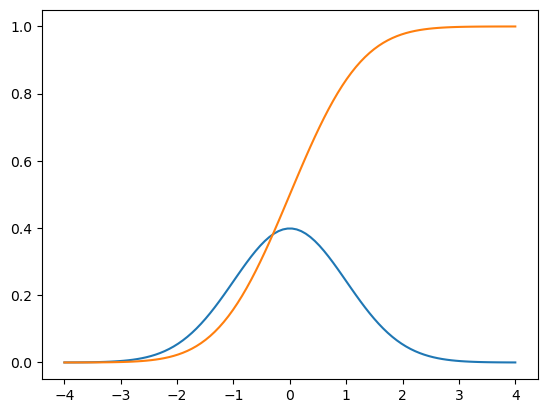

In [6]:
#Your Solution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.cdf(x))#l'intégrale de la loi normale

(array([3.000e+00, 1.000e+00, 6.000e+00, 1.300e+01, 2.800e+01, 4.700e+01,
        8.100e+01, 1.710e+02, 2.330e+02, 3.970e+02, 5.040e+02, 7.040e+02,
        8.330e+02, 9.540e+02, 1.044e+03, 1.027e+03, 9.880e+02, 8.290e+02,
        6.500e+02, 5.260e+02, 3.670e+02, 2.590e+02, 1.580e+02, 8.100e+01,
        4.900e+01, 2.400e+01, 1.500e+01, 5.000e+00, 1.000e+00, 2.000e+00]),
 array([-3.92240025e+00, -3.66077899e+00, -3.39915772e+00, -3.13753646e+00,
        -2.87591519e+00, -2.61429393e+00, -2.35267266e+00, -2.09105139e+00,
        -1.82943013e+00, -1.56780886e+00, -1.30618760e+00, -1.04456633e+00,
        -7.82945068e-01, -5.21323803e-01, -2.59702538e-01,  1.91872741e-03,
         2.63539993e-01,  5.25161258e-01,  7.86782523e-01,  1.04840379e+00,
         1.31002505e+00,  1.57164632e+00,  1.83326758e+00,  2.09488885e+00,
         2.35651011e+00,  2.61813138e+00,  2.87975265e+00,  3.14137391e+00,
         3.40299518e+00,  3.66461644e+00,  3.92623771e+00]),
 <BarContainer object of 30 artists

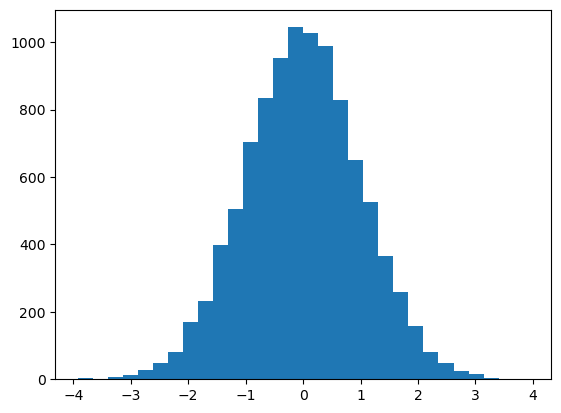

In [7]:
data = norm.rvs(size=10000, random_state=42)
plt.hist(data, bins=30)

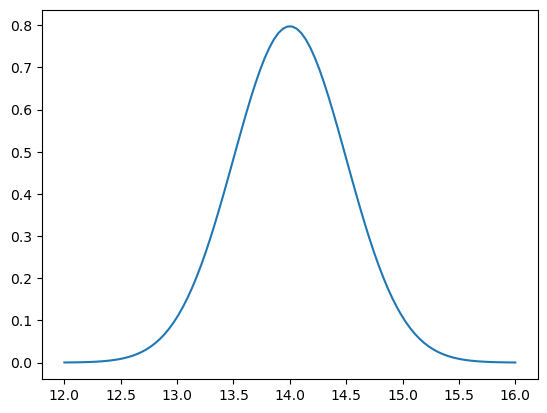

In [8]:
x = np.linspace(12, 16, 100)
plt.plot(x, norm.pdf(x, loc=14, scale=0.5))

In [11]:
df = pd.read_csv('data/solar_cell_efficiencies.csv')
df.describe()

,efficiency
count,187196.000000
mean,14.181805
std,0.488751
min,9.691218
25%,13.932445
50%,14.205567
75%,14.482341
max,17.578530


In [13]:
import scipy
scipy.stats.norm.fit(df['efficiency'])

(14.181805365742568, 0.4887500401256815)

In [14]:
scipy.stats.bernoulli(p=0.7).rvs()

1

<BarContainer object of 11 artists>

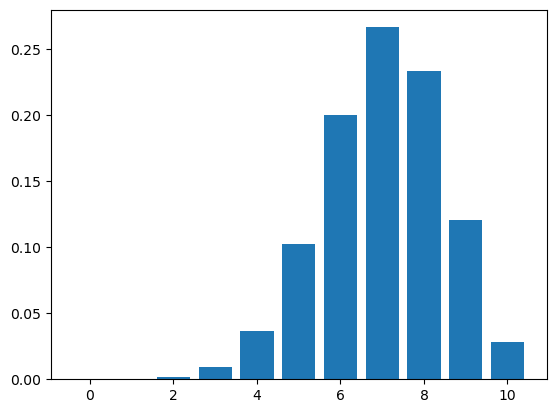

In [15]:
binom_dist = scipy.stats.binom(p=0.7, n=10)
plt.bar(range(11), binom_dist.pmf(k=range(11)))

In [16]:
r = scipy.stats.uniform.rvs(size=1000)

In [18]:
!pip install matplotlib-label-lines

  Using cached more_itertools-9.0.0-py3-none-any.whl (52 kB)


[Text(1.6749999999999998, 0.18734072526020493, 'λ=1'),
 Text(3.3249999999999993, 6.71769231855066e-06, 'λ=4')]

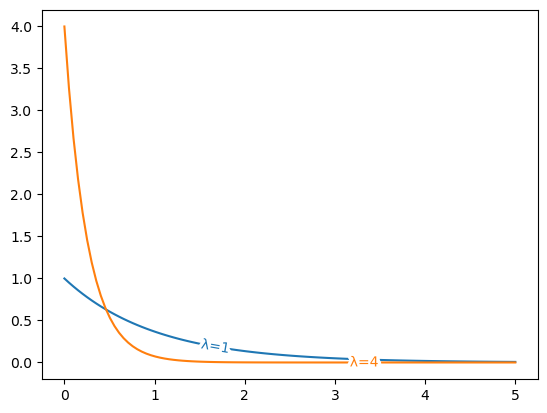

In [19]:
from labellines import labelLines
x = np.linspace(0, 5, 100)
plt.plot(x, scipy.stats.expon.pdf(x, scale=1), label='λ=1')
plt.plot(x, scipy.stats.expon.pdf(x, scale=0.25), label='λ=4')
labelLines(plt.gca().get_lines())

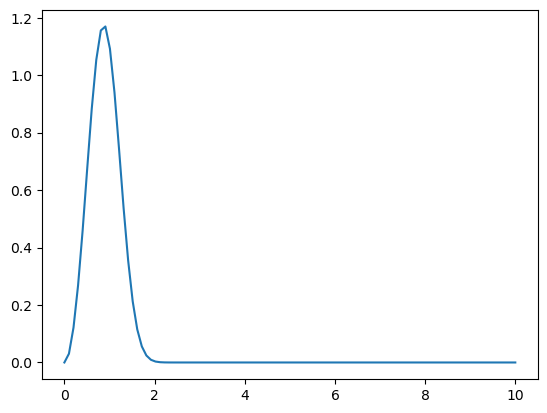

In [20]:
x = np.linspace(0, 10, 100)
plt.plot(x, scipy.stats.weibull_min(c=3).pdf(x))

In [21]:
df = pd.read_csv('data/solar_cell_efficiencies.csv')
df.sample(100, random_state=42)

,efficiency
87591,13.405397
158602,14.404034
107515,14.458128
116535,14.260624
184959,14.336878
...,...
158398,14.292562
32960,14.725099
29208,14.186570
175322,14.054062


<AxesSubplot:ylabel='Count'>

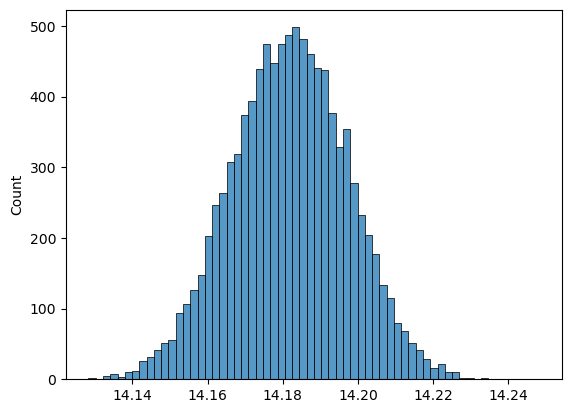

In [24]:
import seaborn as sns
means = []
for i in range(10000):
    sample = np.random.choice(df['efficiency'], 1000, 
    replace=True)
    means.append(sample.mean())
sns.histplot(means)

# MISO distributions
Determine the type of distribution and extract the distribution's PDF parameters from the MISO wind power generation data (the MWh column), stored under  data/miso_wind_data.csv. Write a short analysis explaining why you chose that distribution and what the parameters mean.

`Hint:`
Try to fit your data with different probabilities distributions and see what one works better.



In [25]:
#Your Solutions here
df = pd.read_csv('data/miso_wind_data.csv')

In [26]:
df

,Market Day,Hour Ending,MWh
0,1/1/2020,1,12161.42
1,1/1/2020,2,13090.65
2,1/1/2020,3,13597.16
3,1/1/2020,4,13638.77
4,1/1/2020,5,13320.79
...,...,...,...
8779,12/31/2020,20,8590.43
8780,12/31/2020,21,9424.44
8781,12/31/2020,22,9930.22
8782,12/31/2020,23,9930.29


In [27]:
df['MWh'] = df['MWh'].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Market Day   8784 non-null   object 
 1   Hour Ending  8784 non-null   int64  
 2   MWh          8784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.0+ KB


In [30]:
df.describe()

,Hour Ending,MWh
count,8784.000000,8784.000000
mean,12.500000,8143.348373
std,6.922581,4352.807392
min,1.000000,-33.580000
25%,6.750000,4432.852500
50%,12.500000,7756.870000
75%,18.250000,11726.047500
max,24.000000,19966.710000


In [31]:
scipy.stats.norm.fit(df['MWh'])

(8143.348373178506, 4352.559616211562)

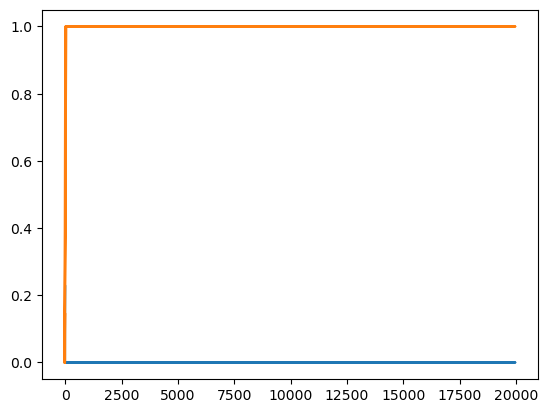

In [40]:
x = df['MWh']
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.cdf(x))

<AxesSubplot:xlabel='MWh', ylabel='Count'>

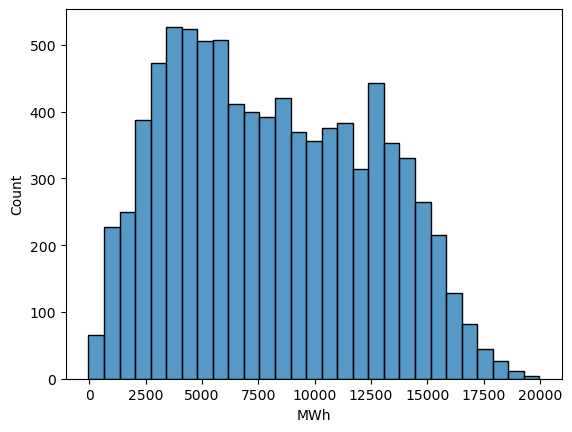

In [33]:
sns.histplot(df['MWh'])

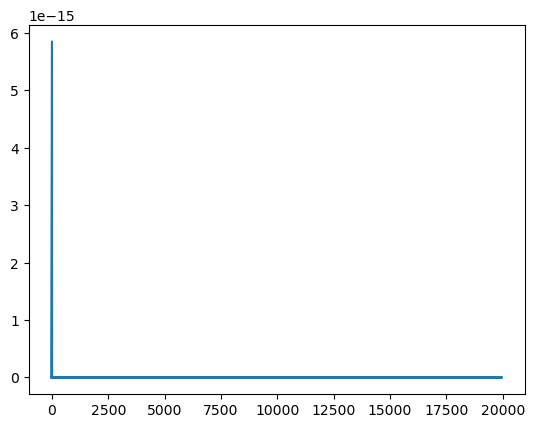

In [41]:
x = df['MWh']
plt.plot(x, scipy.stats.weibull_min(c=3).pdf(x))

[Text(6666.517150000001, 0.0, 'λ=1'), Text(13266.612850000001, 0.0, 'λ=4')]

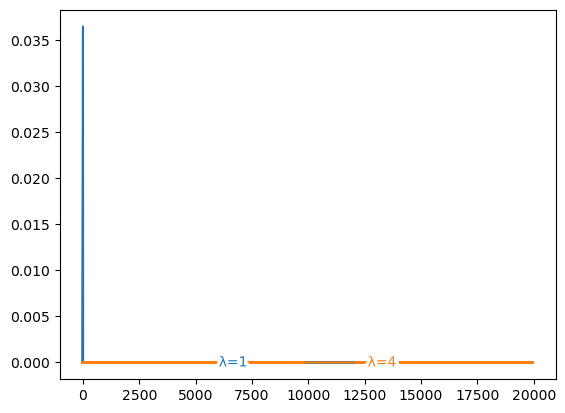

In [42]:
plt.plot(x, scipy.stats.expon.pdf(x, scale=1), label='λ=1')
plt.plot(x, scipy.stats.expon.pdf(x, scale=0.25), label='λ=4')
labelLines(plt.gca().get_lines())

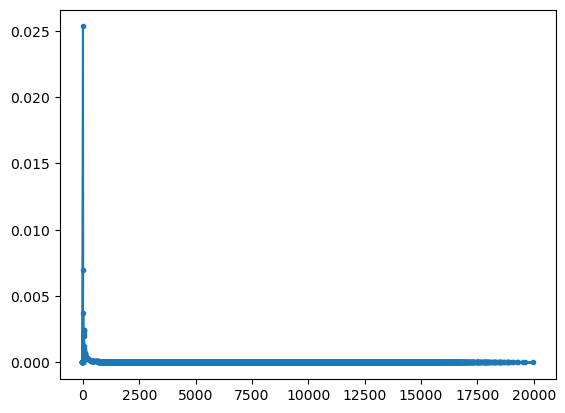

In [43]:
plt.plot(x, scipy.stats.zipf(a=1.1).pmf(x), marker='.')

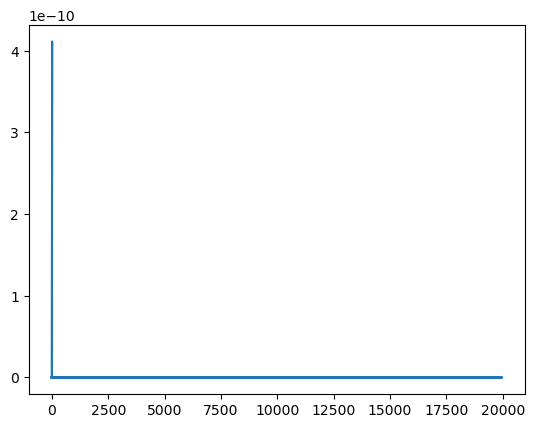

In [44]:
plt.plot(x, norm.pdf(x, loc=14, scale=0.5))


# Bootstrap Sampling
Apply bootstrap sampling to the MISO wind power generation data and plot the distribution of the mean wind power generation values.

<AxesSubplot:ylabel='Count'>

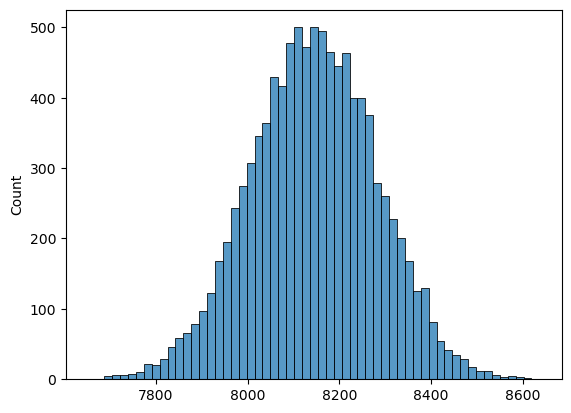

In [36]:
#your solution
means = []
for i in range(10000):
    sample = np.random.choice(df['MWh'], 1000, 
    replace=True)
    means.append(sample.mean())
sns.histplot(means)